<a href="https://colab.research.google.com/github/KhandareAshutosh/Netflix_data_analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import torch
from torch import nn, optim

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Netflix Data Analysis/Netflix Userbase.csv')

print(df.head())
print('----------------------')
print(f'Column Names: \n {df.columns}')

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
----------------------
Column Names: 
 Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       

<Axes: xlabel='Age', ylabel='count'>

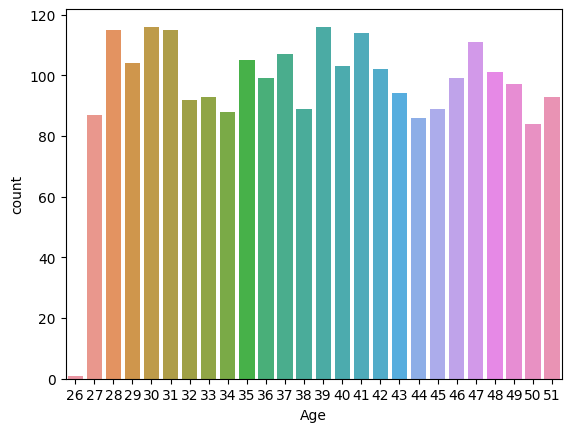

In [3]:
sns.countplot(data = df, x= df['Age'])

<Axes: xlabel='Subscription Type', ylabel='Age'>

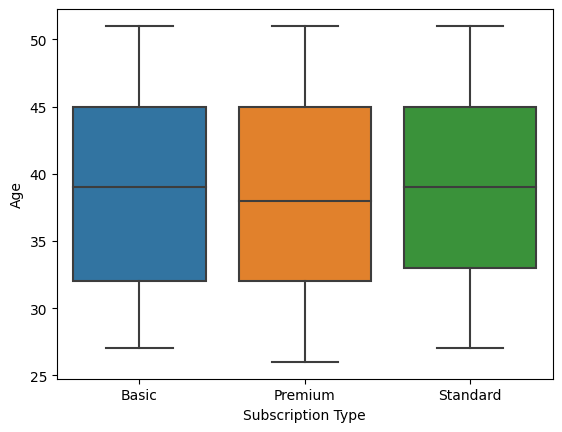

In [4]:
sns.boxplot(data= df, x = 'Subscription Type', y = 'Age')

<Axes: xlabel='Subscription Type', ylabel='Age'>

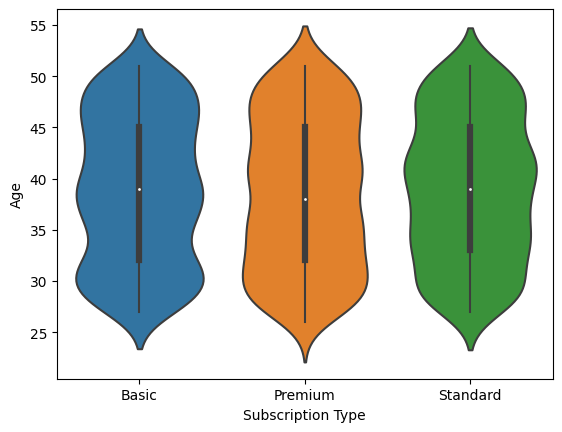

In [5]:
sns.violinplot(data= df, x = 'Subscription Type', y = 'Age')

<Axes: xlabel='Monthly Revenue', ylabel='count'>

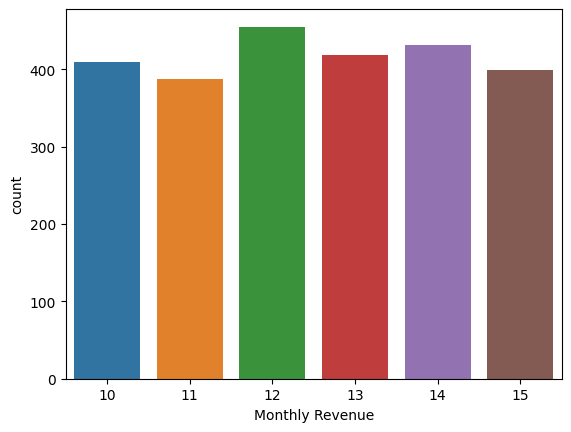

In [6]:
sns.countplot(data = df, x = 'Monthly Revenue')

<Axes: xlabel='Device', ylabel='count'>

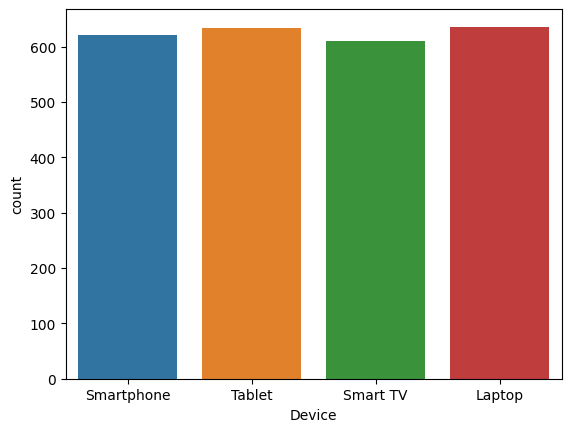

In [7]:
sns.countplot(data = df, x = 'Device')

<Axes: xlabel='Gender', ylabel='count'>

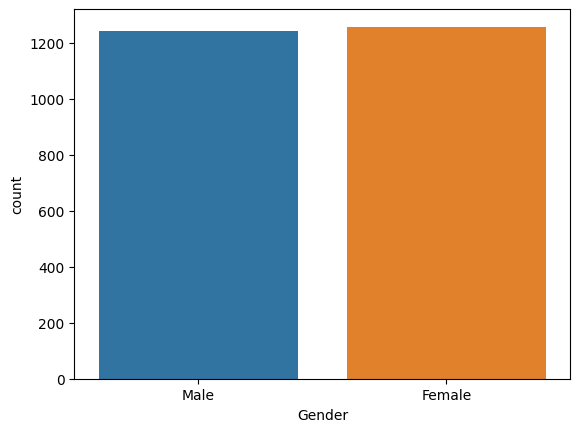

In [8]:
sns.countplot(data = df, x = 'Gender')

<Axes: xlabel='Country', ylabel='count'>

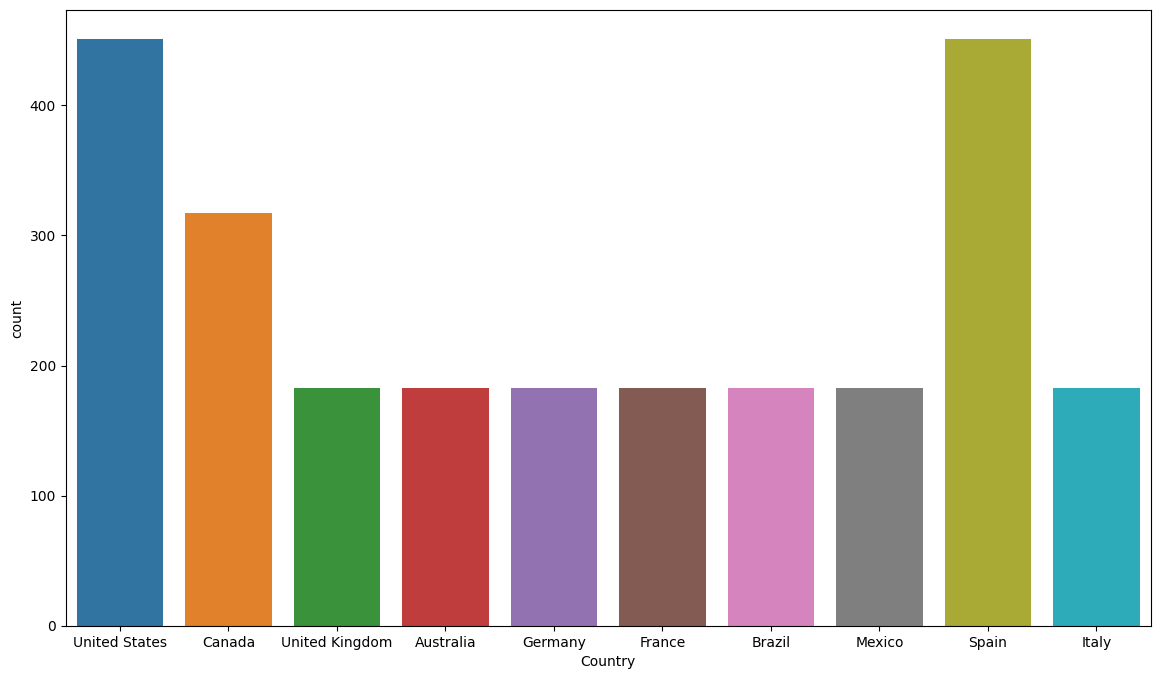

In [9]:
plt.figure(figsize = (14,8))
sns.countplot(data = df, x = 'Country')

In [11]:
# Convert to datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Create duration feature
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

df = df.drop(columns = ['Join Date', 'Last Payment Date', 'User ID', 'Plan Duration', 'Gender'])

# Apply label encoding to the categorical columns

ste = LabelEncoder()
ce = LabelEncoder()
de = LabelEncoder()

df['Subscription Type'] = ste.fit_transform(df['Subscription Type'])
df['Country'] = ce.fit_transform(df['Country'])
df['Device'] = de.fit_transform(df['Device'])

# Normalize the numerical columns
scaler = StandardScaler()
df[['Monthly Revenue', 'Age']] = scaler.fit_transform(df[['Monthly Revenue', 'Age']])

# Split the data into features (X) and target (y)
X = df.drop('Subscription Type', axis = 1)
y = df['Subscription Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Gradient Boosting accuracy:  0.6432


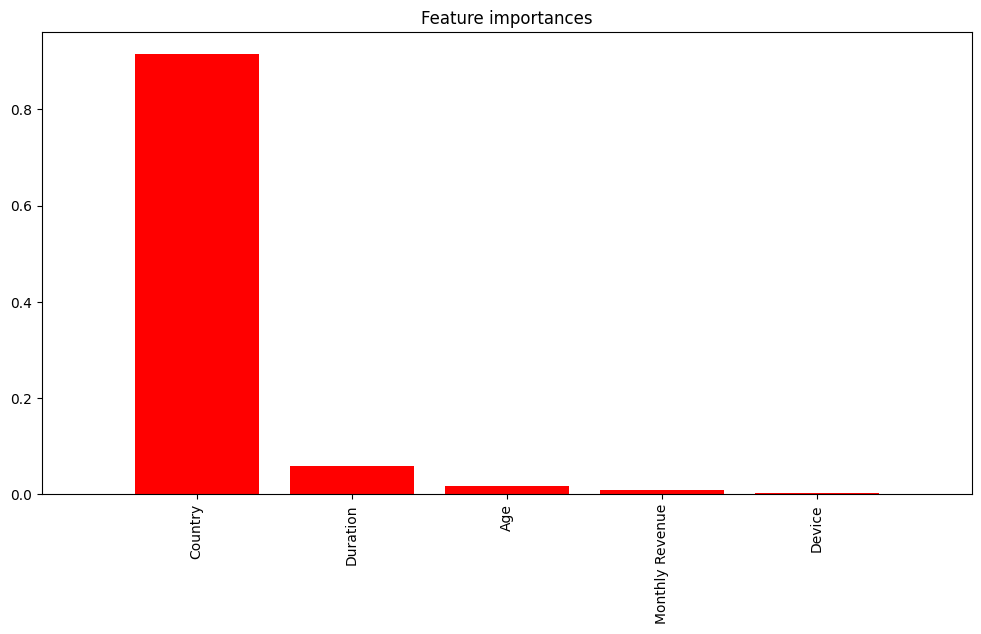

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier(n_estimators=155, learning_rate=1, max_depth=1 , random_state=42)
tree.fit(X_train, y_train)

y_pred_gbc = tree.predict(X_test)
print('Gradient Boosting accuracy: ', accuracy_score(y_test, y_pred_gbc))

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the features based on importance to the model
plt.figure(figsize = (12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color = "r", align = 'center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 'vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [16]:
data = {
    'Monthly Revenue': [10],
    'Country': ['Germany'],
    'Age': [28],
    'Device': ['Smartphone'],
    'Duration': [10]
}

df_test = pd.DataFrame(data)

country_encoder = LabelEncoder()
df_test['Country'] = country_encoder.fit_transform(df_test['Country'])

device_encoder = LabelEncoder()
df_test['Device'] = device_encoder.fit_transform(df_test['Device'])

prediction = tree.predict(df_test)

predicted_subscription_type = ste.inverse_transform(prediction)

print("Predicted Subscription Type: ", predicted_subscription_type)

Predicted Subscription Type:  ['Basic']
